In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [2]:
#loading the dataset
data = pd.read_csv("../input/creditcard.csv")
print('Size of data:',data.shape)

Size of data: (284807, 31)


In [3]:
#there are 284807 rows with 31 columns. Lets analyze the columns now
print("columns:\n",data.columns)

columns:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
#lets look at the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
#all columns are numeric, so we dont have the need to handle categorical values
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#count of class
print(data['Class'].astype('category').value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [7]:
#data is not distributed properly, we may have to do something to rectify this imbalance i data

<Figure size 432x288 with 0 Axes>

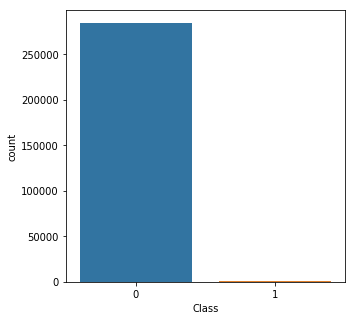

In [8]:
plt.figure(1)
plt.figure(figsize=(5,5))
sns.countplot(data['Class'])
plt.show()

In [9]:
#check for null values
data.isnull().sum().max()

0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.0, 172792.0)

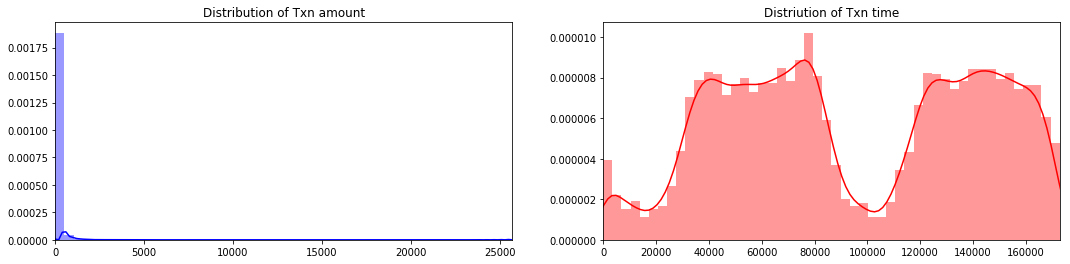

In [10]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

amt = data['Amount'].values
time = data['Time'].values

sns.distplot(amt, ax=ax[0], color = 'blue')
ax[0].set_title('Distribution of Txn amount')
ax[0].set_xlim([min(amt),max(amt)])

sns.distplot(time,ax=ax[1], color='red')
ax[1].set_title('Distriution of Txn time')
ax[1].set_xlim([min(time),max(time)])

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#columns Time and Amount are not scaled, so we will scale them using StandardScaler
from sklearn.preprocessing import StandardScaler

data['normAmount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['normTime'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

print('Shape of data:', data.shape)
print('\nList of columns:', data.columns)

Shape of data: (284807, 33)

List of columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'normAmount', 'normTime'],
      dtype='object')


In [13]:
#dropping the Time and amount columns
data.drop(['Time','Amount'], axis=1, inplace = True)
print('Shape of data:', data.shape)
print('\nList of columns:', data.columns)

Shape of data: (284807, 31)

List of columns: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount',
       'normTime'],
      dtype='object')


There are two ways to perform analysis of such imbalanced data: 
1. Under sampling, 
2. Over sampling
3. SMOTE(Synthetic Minority over sampling technique)

we will be trying Undersampling now

In [14]:
#num of records with class as Fraud
fraud_data = np.array(data.loc[data['Class']==1].index)
print(len(fraud_data))
non_fraud_data = np.array(data.loc[data['Class']!=1].index)
print(len(non_fraud_data))

492
284315


In [15]:
#random selection of non fraud data, of same number of fraud records
random_indices = np.random.choice(non_fraud_data,len(fraud_data),replace=False)
random_indices = np.array(random_indices)
print(len(random_indices))

492


In [16]:
indices = np.concatenate([fraud_data,random_indices])
len(indices)


984

In [17]:
#under sampled data for analysis
data_under = data.iloc[indices,:]
print(data_under.shape)

(984, 31)


In [18]:
#lets check the distribution of data now, it should be 50-50
data_under['Class'].astype('category').value_counts()

1    492
0    492
Name: Class, dtype: int64

In [19]:
#framing X and y dataframes and then splitting for train and test data
X = data_under.drop('Class', axis=1)
y = data_under['Class']
print('Shape of x:', X.shape , '\tShape of y:',y.shape)

Shape of x: (984, 30) 	Shape of y: (984,)


In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state =42)


Logistic regression classifier - Undersampled data
We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:
Accuracy = (TP+TN)/total
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.
Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.
We could even apply a cost function when having FN and FP with different weights for each type of error, but let's leave that aside for now.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc, roc_auc_score,roc_curve,recall_score, classification_report

In [22]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred = lr.predict_proba(X_test)

In [24]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.044656
1,1.000000
2,0.039647
3,0.999971
4,1.000000


In [25]:
y_test_df = pd.DataFrame(y_test)
y_test_df['txn']=y_test_df.index
y_test_df.reset_index(inplace=True, drop = True)
y_test_df.head()


,Class,txn
0,0,204411
1,1,248296
2,0,95689
3,1,239501
4,1,143336


In [26]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis =1)
y_pred_final = y_pred_final.rename(columns={1:'fraud_prob'})
y_pred_final = y_pred_final.reindex_axis(['txn','Class','fraud_prob'],axis=1)
y_pred_final.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,txn,Class,fraud_prob
0,204411,0,0.044656
1,248296,1,1.000000
2,95689,0,0.039647
3,239501,1,0.999971
4,143336,1,1.000000


In [27]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_pred_final[i]=y_pred_final['fraud_prob'].map(lambda x: 1 if x>i else 0)
y_pred_final.head()

,txn,Class,fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,204411,0,0.044656,1,0,0,0,0,0,0,0,0,0
1,248296,1,1.000000,1,1,1,1,1,1,1,1,1,1
2,95689,0,0.039647,1,0,0,0,0,0,0,0,0,0
3,239501,1,0.999971,1,1,1,1,1,1,1,1,1,1
4,143336,1,1.000000,1,1,1,1,1,1,1,1,1,1


In [28]:
import sklearn.metrics as metrics
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final['Class'], y_pred_final[i])
    accuracy = metrics.accuracy_score(y_pred_final['Class'], y_pred_final[i])
    sensitivity = cm1[0,0]/float(cm1[0,0]+cm1[0,1])#metrics.recall_score(y_12_final['Churn'], y_12_final[i])
    specificity = cm1[1,1]/float(cm1[1,1]+cm1[1,0])
    prob = i
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.506757,0.000000,1.000000
0.1,0.1,0.858108,0.732877,0.980000
0.2,0.2,0.908784,0.890411,0.926667
0.3,0.3,0.918919,0.931507,0.906667
0.4,0.4,0.922297,0.945205,0.900000
0.5,0.5,0.929054,0.965753,0.893333
0.6,0.6,0.929054,0.979452,0.880000
0.7,0.7,0.918919,0.979452,0.860000
0.8,0.8,0.908784,0.979452,0.840000
0.9,0.9,0.908784,0.986301,0.833333


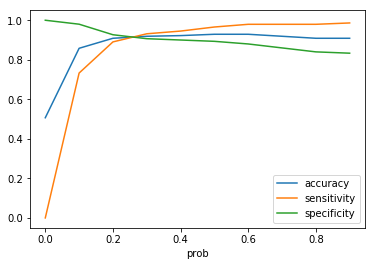

In [29]:
cutoff_df.plot.line(x = 'prob',y = ['accuracy','sensitivity','specificity'])

In [30]:
print('specificity:',cutoff_df.loc[cutoff_df['prob']==0.4]['specificity'])

specificity: 0.4    0.9
Name: specificity, dtype: float64


Dimensionality reduction: PCA and tnse

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

In [32]:
#framing X and y dataframes and then splitting for train and test data
X_dec = data_under.drop('Class', axis=1)
y_dec = data_under['Class']

In [33]:
#T-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X_dec.values)
t1 =time.time()
print('TSNE took {:.2}s'.format(t1-t0))

TSNE took 6.8s


In [34]:
#PCA
t0 = time.time()
X_reduced_PCA = PCA(n_components =2 , random_state=42).fit_transform(X_dec.values)
t1 = time.time()
print('PCA took {:.2}'.format(t1-t0))

PCA took 0.23


In [35]:
#Truncated SVD
t0 = time.time()
X_reduced_TSVD=TruncatedSVD(n_components =2, random_state = 42, algorithm='randomized').fit_transform(X_dec.values)
t1 = time.time()
print('Truncated SVD {:,.2}'.format(t1-t0))

Truncated SVD 0.03


In [36]:
import matplotlib.patches as mpatches

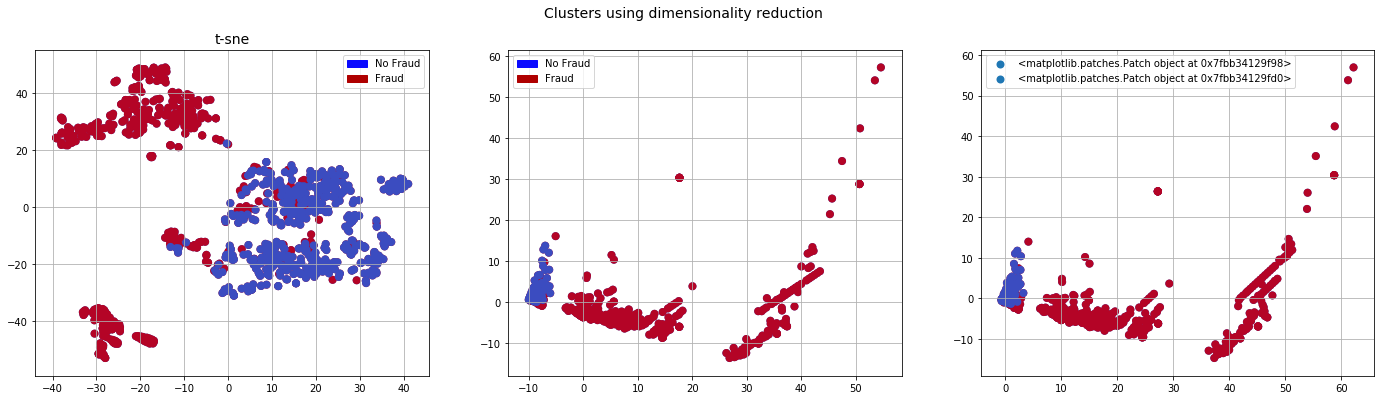

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
f.suptitle('Clusters using dimensionality reduction', fontsize = 14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

#T-sne scatter plot
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==0),cmap = 'coolwarm', label = 'No Fraud',linewidths = 2)
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==1),cmap = 'coolwarm', label = 'Fraud', linewidths =2)
ax1.set_title('t-sne', fontsize =14)
ax1.grid(True)
ax1.legend(handles = [blue_patch,red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1], c= (y==0), cmap='coolwarm', label ='No Fraud', linewidths =2)
ax2.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1], c=(y==1), cmap = 'coolwarm', label = 'Fraud', linewidths = 2)
ax2.grid(True)
ax2.legend(handles = [blue_patch,red_patch])

#Truncated SVD plot
ax3.scatter(X_reduced_TSVD[:,0],X_reduced_TSVD[:,1], c=(y==0), cmap ='coolwarm', label = 'No Fraud', linewidths =2)
ax3.scatter(X_reduced_TSVD[:,0],X_reduced_TSVD[:,1],c=(y==1),cmap = 'coolwarm', label = 'Fraud', linewidths =2)
ax3.grid(True)
ax3.legend([blue_patch, red_patch])

In [38]:
X = data.drop('Class', axis =1)
y = data['Class']

original_Xtrain,original_Xtest, original_ytrain, original_ytest = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state =42)

> **SMOTE analysis** -- Synethtic Minority Oversampling Technique

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))



Using TensorFlow backend.


Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


In [40]:
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(original_Xtrain, original_ytrain.ravel())

print('After oversampling using smote, X_train_res = {}'.format(len(X_train_res)))
print('After oversampling using smote, y_train_res = {}'.format(len(y_train_res)))

After oversampling using smote, X_train_res = 454902
After oversampling using smote, y_train_res = 454902


In [41]:
print('After oversampling using smote: fraud values, y_train_res = {}'.format(sum(y_train_res==1)))
print('After oversampling using smote: Non-fraud values, y_train_res = {}'.format(sum(y_train_res==0)))

After oversampling using smote: fraud values, y_train_res = 227451
After oversampling using smote: Non-fraud values, y_train_res = 227451


In [42]:
# Renaming the datsets
# Here X_train and y_train are given the values from the SMOTE (Oversampling) technique

X_train_non_pca = original_Xtrain.copy()
y_train_non_pca = original_ytrain.copy()

X_train = X_train_res
y_train = y_train_res

In [43]:
print(X_train.shape)

(454902, 30)


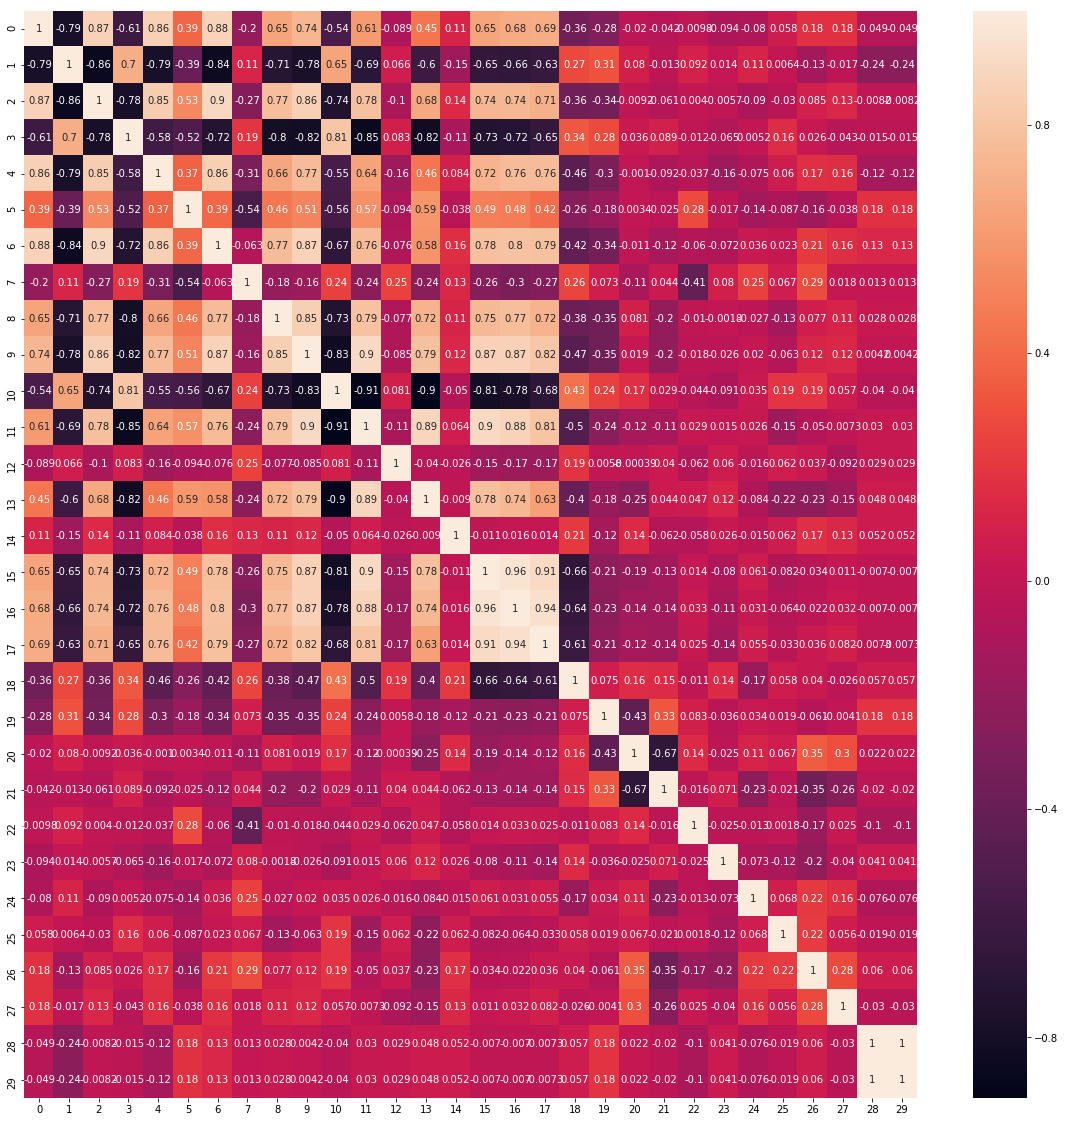

In [44]:
corrmat = np.corrcoef(X_train.T)

plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot = True)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state =42)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [46]:
#plotting principal compnents
pca.components_

array([[-3.04790789e-01,  2.01360056e-01, -3.85928467e-01,
         1.81727526e-01, -2.38409494e-01, -6.23164404e-02,
        -3.50069518e-01,  7.60302555e-02, -1.32814737e-01,
        -2.91102258e-01,  1.59635739e-01, -2.88349542e-01,
         8.43697386e-03, -2.55757581e-01, -5.87059929e-03,
        -2.20393484e-01, -3.82915486e-01, -1.45411367e-01,
         4.49570316e-02,  2.04614491e-02,  1.23142622e-02,
         7.14091827e-03, -5.31495768e-04,  1.70287310e-03,
         1.27054974e-03,  1.91411145e-03, -3.19184442e-03,
        -2.34783183e-03, -1.38179945e-03, -1.38179945e-03],
       [-4.60017888e-01,  1.71828263e-01, -2.44793512e-01,
        -1.17421683e-01, -2.64752463e-01,  8.93412729e-02,
        -3.14675498e-01, -2.10521452e-01,  3.56391374e-02,
         5.65108191e-02, -2.01990744e-01,  2.96526417e-01,
        -9.30307216e-03,  4.59467613e-01, -3.39693264e-02,
         1.75797543e-01,  2.46551060e-01,  5.03291555e-02,
        -5.36500853e-02,  2.60442690e-02, -1.05443945e-

In [47]:
colnames = list(X_train_non_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1],'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.304791,-0.460018,V1
1,0.201360,0.171828,V2
2,-0.385928,-0.244794,V3
3,0.181728,-0.117422,V4
4,-0.238409,-0.264752,V5
5,-0.062316,0.089341,V6
6,-0.350070,-0.314675,V7
7,0.076030,-0.210521,V8
8,-0.132815,0.035639,V9
9,-0.291102,0.056511,V10


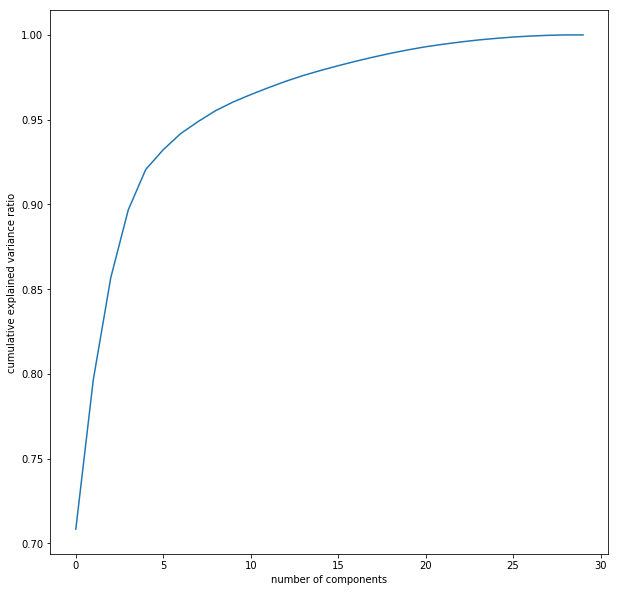

In [48]:
#plotting scree plot

fig =plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance ratio')
plt.show()

In [49]:
#we will set the number of components to that value that covers 95% of variance
pca_final = PCA(0.95)


In [50]:
#Basis  Transformation getting data into our PCs
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(454902, 9)

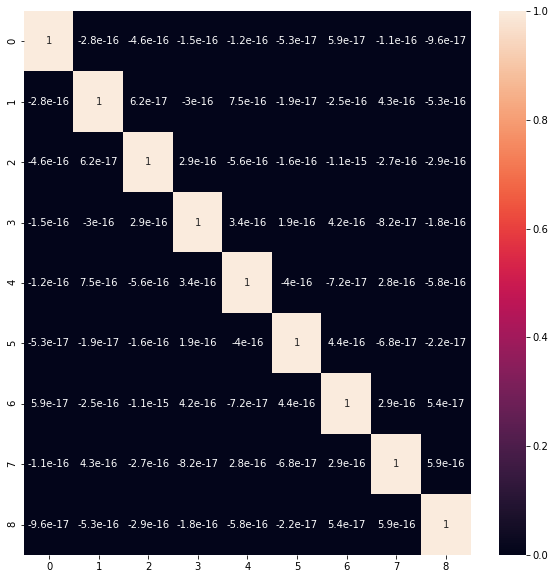

In [51]:
#plotting heatmap
corr = np.corrcoef(df_train_pca.transpose())

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True)
plt.show()

In [52]:
#now all of the coefficients are zeros
#applying the pca transformation to test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(296, 9)

Since the column values are already normalized and reduced, we will not be performing PCA again 

In [53]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(C = 10, kernel='rbf')
model.fit(df_train_pca, y_train)

y_pred = model.predict(y_test_pca)

metrics.confusion_matrix(y_true = y_test, y_pred = y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NameError: name 'y_test_pca' is not defined

https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
https://www.kaggle.com/nschneider/gbm-vs-xgboost-vs-lightgbm